In [1]:
#!/usr/bin/env python
import cv2
import matplotlib
import nbconvert
import matplotlib.pyplot as plt
import csv
import numpy as np
import os
import sys
from numpy import vstack
from numpy import argmax
from pandas import read_csv
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from numpy import vstack
from pandas import read_csv

#Function for the creation of a 3d matrix
def ThreeD(a, b, c):
    lst = [[ ['0' for col in range(a)] for col in range(b)] for row in range(c)]
    return lst

In [2]:
def openCSV(filename):
    """
    Converts a CSV file into an array.

    Parameters
    ----------
    filename: str, the file in question

    Return
    ------
    arr : Any array, the array encoded in the CSV file
    """
    rows = []
    with open(filename) as csvfile:
        reader = csv.reader(csvfile)
        for row in reader:
            rows.append(row)
    arr = np.array(rows)
    return arr

In [3]:
# Trackbars callback functions
datasetPath='C:/Users/Lucrezia/Desktop/Internship/MNM_version2-Revision17/Mingle/'

# LABELS
try:
    filename = datasetPath+'manual_annotations/LABELS.csv'
    labels = openCSV(filename).astype(np.int64)
except FileNotFoundError:
    filename = datasetPath+'manual_annotations/_LABELS.csv'
    labels = openCSV(filename).astype(np.int64)
print("LABELS array shape =", labels.shape)

LABELS array shape = (36000, 828)


In [4]:
N,M= labels.shape
dataset=ThreeD(9, int(M/9), int(N))

for i in range (0,N):
    for j in range(0,M):
        dataset[i][int(j/9)][j%9]=(labels[i][j])

In [5]:
# Trackbars callback functions
DAY=1
# LABELS
try:
    filename1 = datasetPath+'manual_annotations/F-formationsGT/Day'+str(DAY)+'.csv'
    labels1 = openCSV(filename1)
except FileNotFoundError:
    filename1 = datasetPath+'manual_annotations/F-formationsGT/Day'+str(DAY)+'.csv'
    labels1 = openCSV(filename1).astype(np.int64)
print("LABELS array shape =", labels1.shape)
M1,N1=labels1.shape

LABELS array shape = (69, 5)


In [6]:
def partcounter(numbers): 
    a=' '
    cardinality=0
    for i in numbers:
        if i!=' ' and a==' ':
            cardinality+=1
            a='a'
        else:
            cardinality=cardinality
            a=' '  
    return cardinality
def timetofloat(val):
    s=list(val)
    for i in range(0,len(val)):
        if val[i] != ':':
            s[i]=float(val[i])
        elif val[i]==':':
            print(val[i])
    return(s)

In [7]:
def litoint(x):
    val=[]
    val2=[]
    count=0
    for i in x: 
        if i!=' ' and count==0:
            val.append(i)
        elif i!=' ' and count==1:
            val2.append(i)
        else:
            count=1 
    s = [str(integer) for integer in val]
    a_string = "".join(s)
    res = int(a_string)
    
    s1 = [str(integer) for integer in val2]
    a_string1 = "".join(s1)
    res1 = int(a_string1)
    return([res,res1])

In [8]:
#this function will automaticall give the total ID, as input it needs the daily ID,the numer of the day, and the path
def realID(s,day,datasetPath):
    cont=0
    try:
        filename1 = datasetPath+'manual_annotations/PARTICIPANTS.csv'
        labels1 = openCSV(filename1)
    except FileNotFoundError:
        filename1 = datasetPath+'manual_annotations/_PARTICIPANTS.csv'
        labels1 = openCSV(filename1).astype(np.int64)
    for i in labels1:
        cont+=1
        if int(i[0])==DAY:
            if int(i[1])==s:
                return(cont)

In [11]:
M1,N1=labels1.shape
liscoupl=[]
for i in range(0,M1):
    if i!=0:
        if partcounter(labels1[i][0])==2:
            s=litoint(labels1[i][0])
            k=[]
            k.append(realID(s[0],DAY,datasetPath))
            k.append(realID(s[1],DAY,datasetPath))
            liscoupl.append([k,int(labels1[i][3]),int(labels1[i][4])])

In [12]:
print(liscoupl)

[[[3, 29], 12000, 16880], [[2, 14], 12000, 17340], [[12, 17], 12000, 17340], [[5, 22], 12000, 24000], [[10, 25], 12000, 24000], [[1, 4], 12000, 16160], [[21, 23], 12260, 12640], [[15, 26], 12640, 14140], [[13, 23], 13740, 13960], [[13, 21], 13960, 14040], [[9, 28], 14580, 14960], [[3, 18], 17720, 19640], [[8, 28], 18340, 19700], [[13, 23], 18060, 22020], [[15, 21], 18060, 22020], [[2, 9], 18340, 18500], [[12, 17], 18500, 24000], [[20, 30], 18500, 19360], [[20, 30], 19540, 22260], [[4, 26], 19540, 20060], [[8, 28], 20200, 24000], [[4, 26], 20640, 23060], [[30, 31], 22360, 24000], [[3, 29], 22480, 24000]]


In [13]:
def divisory(y,frames):
    lista=[]
    count=0
    for i in range((frames),len(y)):
        lista.append([y[i]])
        count+=1
    lista.append([4])
    return(lista)

In [14]:
#label creation
speaker=[]
spdata=[]
temp=[]
check=[]
for j in range(0,len(liscoupl)):
        temp=[]
        #print('s',speaker)
        for i in range (0,N):
            personid1 = liscoupl[j][0][0]-1
            personid2 = liscoupl[j][0][1]-1
            if i>liscoupl[j][1] and i<liscoupl[j][2]:
                if dataset[i][personid1][3]==1 and dataset[i][personid2][3]==0:
                    temp.append(0)
                    spdata.append(0)
                elif dataset[i][personid1][3]==0 and dataset[i][personid2][3]==1:
                    temp.append(1)
                    spdata.append(1)
                elif dataset[i][personid1][3]==0 and dataset[i][personid2][3]==0:
                    temp.append(3)
                    spdata.append(3)
                elif dataset[i][personid1][3]==1 and dataset[i][personid2][3]==1: 
                    temp.append(2)
                    spdata.append(2)
                else:
                    pass
        check.extend(temp)
        temp.pop(0)
        temp.append(3)
        speaker.extend(temp)

In [15]:
print(len(speaker))

76596


In [17]:
import sys
import csv
maxInt = sys.maxsize
listprov=[]
while True:
    # decrease the maxInt value by factor 10 
    # as long as the OverflowError occurs.

    try:
        csv.field_size_limit(maxInt)
        break
    except OverflowError:
        maxInt = int(maxInt/10)
tempo=-1
with open('couplesalldayprova.csv', 'w',newline='') as csvfile:
    biglist=[]
    biglist2=[]
    writer = csv.writer(csvfile)
    for j in range(0,len(liscoupl)):
        for i in range (0,N):
            personid1 = liscoupl[j][0][0]-1
            personid2 = liscoupl[j][0][1]-1
            if i>liscoupl[j][1] and i<liscoupl[j][2]:
                tempo+=1
                listprov.append([dataset[i][personid1][0],dataset[i][personid1][1],dataset[i][personid1][2],dataset[i][personid1][3],dataset[i][personid1][4],dataset[i][personid1][5],dataset[i][personid1][6],dataset[i][personid1][7],dataset[i][personid2][0],dataset[i][personid2][1],dataset[i][personid2][2],dataset[i][personid2][3],dataset[i][personid2][4],dataset[i][personid2][5],dataset[i][personid2][6],dataset[i][personid2][7],spdata[tempo]])
                if (dataset[i][personid1][3]==1 and dataset[i][personid2][3]==0) and spdata[tempo]==0:
                    pass
                elif (dataset[i][personid1][3]==0 and dataset[i][personid2][3]==1) and spdata[tempo]==1:
                    pass
                elif (dataset[i][personid1][3]==0 and dataset[i][personid2][3]==0) and spdata[tempo]==3:
                    pass
                elif (dataset[i][personid1][3]==1 and dataset[i][personid2][3]==1) and spdata[tempo]==2: 
                    pass
                else: 
                    print('ERRORE')
                    print(dataset[i][personid1][3])
                    print(dataset[i][personid2][3])
                    print(speaker[tempo])
        biglist2.extend(listprov)       
        writer.writerow([listprov])

In [176]:
Walkingl=0
Steppingl=0
Drinkingl=0
Speakingl=0
Hand_Gesturel=0
Head_Gesturel=0
Laughl=0
Hair_Touchingl=0
temp1l=[]
cont1l=0

Walkings=0
Steppings=0
Drinkings=0
Speakings=0
Hand_Gestures=0
Head_Gestures=0
Laughs=0
Hair_Touchings=0
temp1s=[]
cont1s=0
sp=0
con2=0
conttot=0
for i in range(len(speaker)-1):
    if listprov[i][16]==0:
        sp=0
    elif listprov[i][16]==1:
        sp=1
    elif listprov[i][16]==2:
        cont+=1
    if listprov[i][16]!=2:
        cont=0
    if listprov[i][16]==2 and speaker[i]==1 and sp==0 :
        Walkingl+=listprov[i][0]
        Steppingl+=listprov[i][1]
        Drinkingl+=listprov[i][2]
        Speakingl+=listprov[i][3]
        Hand_Gesturel+=listprov[i][4]
        Head_Gesturel+=listprov[i][5]
        Laughl+=listprov[i][6]
        Hair_Touchingl+=listprov[i][7]
        cont1l+=1
        temp1l.append(cont1l)
        
        Walkings+=listprov[i-cont][8]
        Steppings+=listprov[i-cont][9]
        Drinkings+=listprov[i-cont][10]
        Speakings+=listprov[i-cont][11]
        Hand_Gestures+=listprov[i-cont][12]
        Head_Gestures+=listprov[i-cont][13]
        Laughs+=listprov[i-cont][14]
        Hair_Touchings+=listprov[i-cont][15]
        cont1s+=1
        temp1s.append(cont1s)

    if (listprov[i][16]==0 and speaker[i]==1) or (listprov[i][16]==3 and speaker[i]==1 and sp==0) :#person 0 speaking and nextperson 1
        Walkingl+=listprov[i][0]
        Steppingl+=listprov[i][1]
        Drinkingl+=listprov[i][2]
        Speakingl+=listprov[i][3]
        Hand_Gesturel+=listprov[i][4]
        Head_Gesturel+=listprov[i][5]
        Laughl+=listprov[i][6]
        Hair_Touchingl+=listprov[i][7]
        cont1l+=1
        temp1l.append(cont1l)

        Walkings+=listprov[i][8]
        Steppings+=listprov[i][9]
        Drinkings+=listprov[i][10]
        Speakings+=listprov[i][11]
        Hand_Gestures+=listprov[i][12]
        Head_Gestures+=listprov[i][13]
        Laughs+=listprov[i][14]
        Hair_Touchings+=listprov[i][15]
        cont1s+=1
        temp1s.append(cont1s)
        
    if listprov[i][16]==2 and speaker[i]==0 and sp==1:
        Walkingl+=listprov[i][7]
        Walkingl+=listprov[i][8]
        Steppingl+=listprov[i][9]
        Drinkingl+=listprov[i][10]
        Speakingl+=listprov[i][11]
        Hand_Gesturel+=listprov[i][12]
        Head_Gesturel+=listprov[i][13]
        Laughl+=listprov[i][14]
        Hair_Touchingl+=listprov[i][15]
        cont1l+=1
        temp1l.append(cont1l)

        Walkings+=listprov[i-cont][0]
        Steppings+=listprov[i-cont][1]
        Drinkings+=listprov[i-cont][2]
        Speakings+=listprov[i-cont][3]
        Hand_Gestures+=listprov[i-cont][4]
        Head_Gestures+=listprov[i-cont][5]
        Laughs+=listprov[i-cont][6]
        Hair_Touchings+=listprov[i-cont][7]
        cont1s+=1
        temp1s.append(cont1s)
        
    if (listprov[i][16]==1 and speaker[i]==0) or (listprov[i][16]==3 and speaker[i]==0 and sp==1):#person 1 speaking and nextperson 0
        Walkingl+=listprov[i][7]
        Walkingl+=listprov[i][8]
        Steppingl+=listprov[i][9]
        Drinkingl+=listprov[i][10]
        Speakingl+=listprov[i][11]
        Hand_Gesturel+=listprov[i][12]
        Head_Gesturel+=listprov[i][13]
        Laughl+=listprov[i][14]
        Hair_Touchingl+=listprov[i][15]
        cont1l+=1
        temp1l.append(cont1l)

        Walkings+=listprov[i][0]
        Steppings+=listprov[i][1]
        Drinkings+=listprov[i][2]
        Speakings+=listprov[i][3]
        Hand_Gestures+=listprov[i][4]
        Head_Gestures+=listprov[i][5]
        Laughs+=listprov[i][6]
        Hair_Touchings+=listprov[i][7]
        cont1s+=1
        temp1s.append(cont1s)   

In [135]:
#Day 1
print('Next Speaker Before Turn Changing')
print(cont1s)
print('Walking: ',Walkings,' Perc: ', (Walkings/cont1s)*100)
print('Stepping: ',Steppings,' Perc: ', (Steppings/cont1s)*100)
print('Drinking: ',Drinkings,' Perc: ', (Drinkings/cont1s)*100)
print('Speaking: ',Speakings,' Perc: ', (Speakings/cont1s)*100)
print('Hand_Gesture: ',Hand_Gestures,' Perc: ', (Hand_Gestures/cont1s)*100)
print('Head_Gesture: ',Head_Gestures,' Perc: ', (Head_Gestures/cont1s)*100)
print('Laugh: ',Laughs,' Perc: ', (Laughs/cont1s)*100)
print('Hair_Touching: ',Hair_Touchings,' Perc: ', (Hair_Touchings/cont1s)*100)

print('Next Listener Before Turn Changing ')
print(cont1l)
print('Walking: ',Walkingl,' Perc: ', (Walkingl/cont1l)*100)
print('Stepping: ',Steppingl,' Perc: ', (Steppingl/cont1l)*100)
print('Drinking: ',Drinkingl,' Perc: ', (Drinkingl/cont1l)*100)
print('Speaking: ',Speakingl,' Perc: ', (Speakingl/cont1l)*100)
print('Hand_Gesture: ',Hand_Gesturel,' Perc: ', (Hand_Gesturel/cont1l)*100)
print('Head_Gesture: ',Head_Gesturel,' Perc: ', (Head_Gesturel/cont1l)*100)
print('Laugh: ',Laughl,' Perc: ', (Laughl/cont1l)*100)
print('Hair_Touching: ',Hair_Touchingl,' Perc: ', (Hair_Touchingl/cont1l)*100)

Next Speaker Before Turn Changing
318
Walking:  1  Perc:  0.3144654088050315
Stepping:  48  Perc:  15.09433962264151
Drinking:  3  Perc:  0.9433962264150944
Speaking:  0  Perc:  0.0
Hand_Gesture:  73  Perc:  22.955974842767297
Head_Gesture:  70  Perc:  22.0125786163522
Laugh:  8  Perc:  2.515723270440252
Hair_Touching:  17  Perc:  5.345911949685535
Next Listener Before Turn Changing 
318
Walking:  13  Perc:  4.088050314465408
Stepping:  31  Perc:  9.748427672955975
Drinking:  13  Perc:  4.088050314465408
Speaking:  154  Perc:  48.42767295597484
Hand_Gesture:  86  Perc:  27.044025157232703
Head_Gesture:  41  Perc:  12.89308176100629
Laugh:  10  Perc:  3.1446540880503147
Hair_Touching:  22  Perc:  6.918238993710692


In [122]:
#Day 2
print('Next Speaker Before Turn Changing')
print(cont1s)
print('Walking: ',Walkings,' Perc: ', (Walkings/cont1s)*100)
print('Stepping: ',Steppings,' Perc: ', (Steppings/cont1s)*100)
print('Drinking: ',Drinkings,' Perc: ', (Drinkings/cont1s)*100)
print('Speaking: ',Speakings,' Perc: ', (Speakings/cont1s)*100)
print('Hand_Gesture: ',Hand_Gestures,' Perc: ', (Hand_Gestures/cont1s)*100)
print('Head_Gesture: ',Head_Gestures,' Perc: ', (Head_Gestures/cont1s)*100)
print('Laugh: ',Laughs,' Perc: ', (Laughs/cont1s)*100)
print('Hair_Touching: ',Hair_Touchings,' Perc: ', (Hair_Touchings/cont1s)*100)

print('Next Listener Before Turn Changing ')
print(cont1l)
print('Walking: ',Walkingl,' Perc: ', (Walkingl/cont1l)*100)
print('Stepping: ',Steppingl,' Perc: ', (Steppingl/cont1l)*100)
print('Drinking: ',Drinkingl,' Perc: ', (Drinkingl/cont1l)*100)
print('Speaking: ',Speakingl,' Perc: ', (Speakingl/cont1l)*100)
print('Hand_Gesture: ',Hand_Gesturel,' Perc: ', (Hand_Gesturel/cont1l)*100)
print('Head_Gesture: ',Head_Gesturel,' Perc: ', (Head_Gesturel/cont1l)*100)
print('Laugh: ',Laughl,' Perc: ', (Laughl/cont1l)*100)
print('Hair_Touching: ',Hair_Touchingl,' Perc: ', (Hair_Touchingl/cont1l)*100)

Next Speaker Before Turn Changing
81
Walking:  1  Perc:  1.2345679012345678
Stepping:  15  Perc:  18.51851851851852
Drinking:  3  Perc:  3.7037037037037033
Speaking:  0  Perc:  0.0
Hand_Gesture:  11  Perc:  13.580246913580247
Head_Gesture:  11  Perc:  13.580246913580247
Laugh:  4  Perc:  4.938271604938271
Hair_Touching:  2  Perc:  2.4691358024691357
Next Listener Before Turn Changing 
81
Walking:  2  Perc:  2.4691358024691357
Stepping:  15  Perc:  18.51851851851852
Drinking:  6  Perc:  7.4074074074074066
Speaking:  31  Perc:  38.2716049382716
Hand_Gesture:  19  Perc:  23.456790123456788
Head_Gesture:  7  Perc:  8.641975308641975
Laugh:  3  Perc:  3.7037037037037033
Hair_Touching:  2  Perc:  2.4691358024691357


In [109]:
#Day 3
print('Next Speaker Before Turn Changing')
print(cont1s)
print('Walking: ',Walkings,' Perc: ', (Walkings/cont1s)*100)
print('Stepping: ',Steppings,' Perc: ', (Steppings/cont1s)*100)
print('Drinking: ',Drinkings,' Perc: ', (Drinkings/cont1s)*100)
print('Speaking: ',Speakings,' Perc: ', (Speakings/cont1s)*100)
print('Hand_Gesture: ',Hand_Gestures,' Perc: ', (Hand_Gestures/cont1s)*100)
print('Head_Gesture: ',Head_Gestures,' Perc: ', (Head_Gestures/cont1s)*100)
print('Laugh: ',Laughs,' Perc: ', (Laughs/cont1s)*100)
print('Hair_Touching: ',Hair_Touchings,' Perc: ', (Hair_Touchings/cont1s)*100)

print('Next Listener Before Turn Changing ')
print(cont1l)
print('Walking: ',Walkingl,' Perc: ', (Walkingl/cont1l)*100)
print('Stepping: ',Steppingl,' Perc: ', (Steppingl/cont1l)*100)
print('Drinking: ',Drinkingl,' Perc: ', (Drinkingl/cont1l)*100)
print('Speaking: ',Speakingl,' Perc: ', (Speakingl/cont1l)*100)
print('Hand_Gesture: ',Hand_Gesturel,' Perc: ', (Hand_Gesturel/cont1l)*100)
print('Head_Gesture: ',Head_Gesturel,' Perc: ', (Head_Gesturel/cont1l)*100)
print('Laugh: ',Laughl,' Perc: ', (Laughl/cont1l)*100)
print('Hair_Touching: ',Hair_Touchingl,' Perc: ', (Hair_Touchingl/cont1l)*100)

Next Speaker Before Turn Changing
79
Walking:  0  Perc:  0.0
Stepping:  11  Perc:  13.924050632911392
Drinking:  0  Perc:  0.0
Speaking:  0  Perc:  0.0
Hand_Gesture:  20  Perc:  25.31645569620253
Head_Gesture:  8  Perc:  10.126582278481013
Laugh:  4  Perc:  5.063291139240507
Hair_Touching:  1  Perc:  1.2658227848101267
Next Listener Before Turn Changing 
79
Walking:  1  Perc:  1.2658227848101267
Stepping:  14  Perc:  17.72151898734177
Drinking:  1  Perc:  1.2658227848101267
Speaking:  44  Perc:  55.69620253164557
Hand_Gesture:  26  Perc:  32.91139240506329
Head_Gesture:  7  Perc:  8.860759493670885
Laugh:  3  Perc:  3.79746835443038
Hair_Touching:  4  Perc:  5.063291139240507


In [178]:
cont_t=79+81+318

walkns_t=((2)/cont_t)*100
walknl_t=((13+2+1)/cont_t)*100

stepns_t=((48+15+11)/cont_t)*100
stepnl_t=((31+15+14)/cont_t)*100

drkns_t=((6)/cont_t)*100
drknl_t=((20)/cont_t)*100

spkns_t=((0)/cont_t)*100
spknl_t=((154+31+44)/cont_t)*100

handns_t=((73+11+20)/cont_t)*100
handnl_t=((86+19+26)/cont_t)*100

headns_t=((70+11+8)/cont_t)*100
headnl_t=((41+7+7)/cont_t)*100

launs_t=((16)/cont_t)*100
launl_t=((16)/cont_t)*100

hairns_t=((20)/cont_t)*100
hairnl_t=((28)/cont_t)*100


C:\Users\Lucrezia\AppData\Local\Temp/ipykernel_16416/1829261039.py:31: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "bbox" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('Peractionbefturndivver.png',bbox='tight_layout',dpi=200)


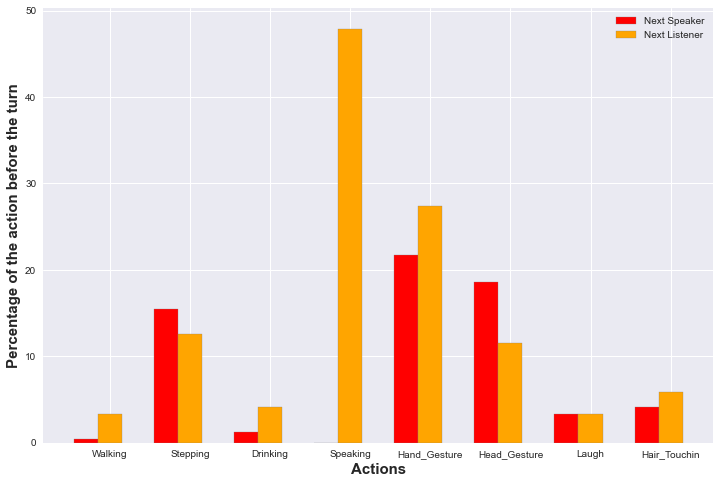

In [179]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('seaborn')
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(12, 8))
 
# set height of bar
TurnCh_To_Speak = [walkns_t,stepns_t,drkns_t,spkns_t,handns_t,headns_t,launs_t,hairns_t]
To_Listen = [walknl_t,stepnl_t,drknl_t,spknl_t,handnl_t,headnl_t,launl_t,hairnl_t]
# Set position of bar on X axis
br1 = np.arange(len(TurnCh_To_Speak))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1, TurnCh_To_Speak, color ='r', width = barWidth,
        edgecolor ='grey', label ='Next Speaker')
plt.bar(br2, To_Listen, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Next Listener')


 
# Adding Xticks
plt.xlabel('Actions', fontweight ='bold', fontsize = 15)
plt.ylabel('Percentage of the action before the turn', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(TurnCh_To_Speak))],
        ['Walking','Stepping','Drinking','Speaking','Hand_Gesture','Head_Gesture', 'Laugh', 'Hair_Touchin'])
 
plt.legend()
plt.savefig('Peractionbefturndivver.png',bbox='tight_layout',dpi=200)

plt.show()

In [ ]:
#listener one frame after the talker start to talk

In [147]:
#DAY1
print('Next Speaker Before Turn Changing')
print(cont1s)
print('Walking: ',Walkings,' Perc: ', (Walkings/cont1s)*100)
print('Stepping: ',Steppings,' Perc: ', (Steppings/cont1s)*100)
print('Drinking: ',Drinkings,' Perc: ', (Drinkings/cont1s)*100)
print('Speaking: ',Speakings,' Perc: ', (Speakings/cont1s)*100)
print('Hand_Gesture: ',Hand_Gestures,' Perc: ', (Hand_Gestures/cont1s)*100)
print('Head_Gesture: ',Head_Gestures,' Perc: ', (Head_Gestures/cont1s)*100)
print('Laugh: ',Laughs,' Perc: ', (Laughs/cont1s)*100)
print('Hair_Touching: ',Hair_Touchings,' Perc: ', (Hair_Touchings/cont1s)*100)

print('Next Listener Before Turn Changing ')
print(cont1l)
print('Walking: ',Walkingl,' Perc: ', (Walkingl/cont1l)*100)
print('Stepping: ',Steppingl,' Perc: ', (Steppingl/cont1l)*100)
print('Drinking: ',Drinkingl,' Perc: ', (Drinkingl/cont1l)*100)
print('Speaking: ',Speakingl,' Perc: ', (Speakingl/cont1l)*100)
print('Hand_Gesture: ',Hand_Gesturel,' Perc: ', (Hand_Gesturel/cont1l)*100)
print('Head_Gesture: ',Head_Gesturel,' Perc: ', (Head_Gesturel/cont1l)*100)
print('Laugh: ',Laughl,' Perc: ', (Laughl/cont1l)*100)
print('Hair_Touching: ',Hair_Touchingl,' Perc: ', (Hair_Touchingl/cont1l)*100)

Next Speaker Before Turn Changing
318
Walking:  1  Perc:  0.3144654088050315
Stepping:  48  Perc:  15.09433962264151
Drinking:  3  Perc:  0.9433962264150944
Speaking:  0  Perc:  0.0
Hand_Gesture:  73  Perc:  22.955974842767297
Head_Gesture:  70  Perc:  22.0125786163522
Laugh:  8  Perc:  2.515723270440252
Hair_Touching:  17  Perc:  5.345911949685535
Next Listener Before Turn Changing 
318
Walking:  12  Perc:  3.7735849056603774
Stepping:  31  Perc:  9.748427672955975
Drinking:  14  Perc:  4.40251572327044
Speaking:  0  Perc:  0.0
Hand_Gesture:  66  Perc:  20.754716981132077
Head_Gesture:  35  Perc:  11.0062893081761
Laugh:  9  Perc:  2.8301886792452833
Hair_Touching:  20  Perc:  6.289308176100629


In [160]:
#DAY2 
print('Next Speaker Before Turn Changing')
print(cont1s)
print('Walking: ',Walkings,' Perc: ', (Walkings/cont1s)*100)
print('Stepping: ',Steppings,' Perc: ', (Steppings/cont1s)*100)
print('Drinking: ',Drinkings,' Perc: ', (Drinkings/cont1s)*100)
print('Speaking: ',Speakings,' Perc: ', (Speakings/cont1s)*100)
print('Hand_Gesture: ',Hand_Gestures,' Perc: ', (Hand_Gestures/cont1s)*100)
print('Head_Gesture: ',Head_Gestures,' Perc: ', (Head_Gestures/cont1s)*100)
print('Laugh: ',Laughs,' Perc: ', (Laughs/cont1s)*100)
print('Hair_Touching: ',Hair_Touchings,' Perc: ', (Hair_Touchings/cont1s)*100)

print('Next Listener Before Turn Changing ')
print(cont1l)
print('Walking: ',Walkingl,' Perc: ', (Walkingl/cont1l)*100)
print('Stepping: ',Steppingl,' Perc: ', (Steppingl/cont1l)*100)
print('Drinking: ',Drinkingl,' Perc: ', (Drinkingl/cont1l)*100)
print('Speaking: ',Speakingl,' Perc: ', (Speakingl/cont1l)*100)
print('Hand_Gesture: ',Hand_Gesturel,' Perc: ', (Hand_Gesturel/cont1l)*100)
print('Head_Gesture: ',Head_Gesturel,' Perc: ', (Head_Gesturel/cont1l)*100)
print('Laugh: ',Laughl,' Perc: ', (Laughl/cont1l)*100)
print('Hair_Touching: ',Hair_Touchingl,' Perc: ', (Hair_Touchingl/cont1l)*100)

Next Speaker Before Turn Changing
81
Walking:  1  Perc:  1.2345679012345678
Stepping:  15  Perc:  18.51851851851852
Drinking:  3  Perc:  3.7037037037037033
Speaking:  0  Perc:  0.0
Hand_Gesture:  11  Perc:  13.580246913580247
Head_Gesture:  11  Perc:  13.580246913580247
Laugh:  4  Perc:  4.938271604938271
Hair_Touching:  2  Perc:  2.4691358024691357
Next Listener Before Turn Changing 
81
Walking:  2  Perc:  2.4691358024691357
Stepping:  15  Perc:  18.51851851851852
Drinking:  6  Perc:  7.4074074074074066
Speaking:  0  Perc:  0.0
Hand_Gesture:  14  Perc:  17.28395061728395
Head_Gesture:  5  Perc:  6.172839506172839
Laugh:  2  Perc:  2.4691358024691357
Hair_Touching:  2  Perc:  2.4691358024691357


In [177]:
#DAY3
print('Next Speaker Before Turn Changing')
print(cont1s)
print('Walking: ',Walkings,' Perc: ', (Walkings/cont1s)*100)
print('Stepping: ',Steppings,' Perc: ', (Steppings/cont1s)*100)
print('Drinking: ',Drinkings,' Perc: ', (Drinkings/cont1s)*100)
print('Speaking: ',Speakings,' Perc: ', (Speakings/cont1s)*100)
print('Hand_Gesture: ',Hand_Gestures,' Perc: ', (Hand_Gestures/cont1s)*100)
print('Head_Gesture: ',Head_Gestures,' Perc: ', (Head_Gestures/cont1s)*100)
print('Laugh: ',Laughs,' Perc: ', (Laughs/cont1s)*100)
print('Hair_Touching: ',Hair_Touchings,' Perc: ', (Hair_Touchings/cont1s)*100)

print('Next Listener Before Turn Changing ')
print(cont1l)
print('Walking: ',Walkingl,' Perc: ', (Walkingl/cont1l)*100)
print('Stepping: ',Steppingl,' Perc: ', (Steppingl/cont1l)*100)
print('Drinking: ',Drinkingl,' Perc: ', (Drinkingl/cont1l)*100)
print('Speaking: ',Speakingl,' Perc: ', (Speakingl/cont1l)*100)
print('Hand_Gesture: ',Hand_Gesturel,' Perc: ', (Hand_Gesturel/cont1l)*100)
print('Head_Gesture: ',Head_Gesturel,' Perc: ', (Head_Gesturel/cont1l)*100)
print('Laugh: ',Laughl,' Perc: ', (Laughl/cont1l)*100)
print('Hair_Touching: ',Hair_Touchingl,' Perc: ', (Hair_Touchingl/cont1l)*100)

Next Speaker Before Turn Changing
79
Walking:  0  Perc:  0.0
Stepping:  11  Perc:  13.924050632911392
Drinking:  0  Perc:  0.0
Speaking:  0  Perc:  0.0
Hand_Gesture:  20  Perc:  25.31645569620253
Head_Gesture:  8  Perc:  10.126582278481013
Laugh:  4  Perc:  5.063291139240507
Hair_Touching:  1  Perc:  1.2658227848101267
Next Listener Before Turn Changing 
79
Walking:  2  Perc:  2.5316455696202533
Stepping:  14  Perc:  17.72151898734177
Drinking:  1  Perc:  1.2658227848101267
Speaking:  0  Perc:  0.0
Hand_Gesture:  24  Perc:  30.37974683544304
Head_Gesture:  2  Perc:  2.5316455696202533
Laugh:  3  Perc:  3.79746835443038
Hair_Touching:  4  Perc:  5.063291139240507


In [11]:
cont_t=79+81+318

walkns_t=((2)/cont_t)*100
walknl_t=((13+2+1)/cont_t)*100

stepns_t=((48+15+11)/cont_t)*100
stepnl_t=((31+15+14)/cont_t)*100

drkns_t=((6)/cont_t)*100
drknl_t=((21)/cont_t)*100

spkns_t=((0)/cont_t)*100
spknl_t=((154+31+44)/cont_t)*100

handns_t=((73+11+20)/cont_t)*100
handnl_t=((66+14+23)/cont_t)*100

headns_t=((70+11+8)/cont_t)*100
headnl_t=((35+5+2)/cont_t)*100

launs_t=((16)/cont_t)*100
launl_t=((16)/cont_t)*100

hairns_t=((20)/cont_t)*100
hairnl_t=((26)/cont_t)*100

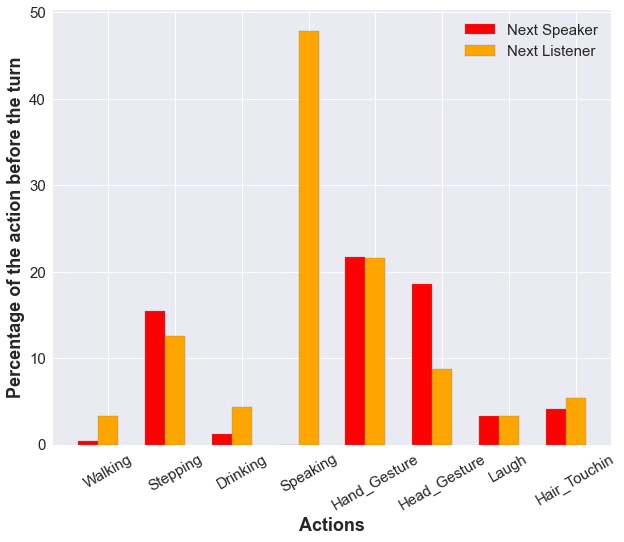

In [12]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('seaborn')
# set width of bar
barWidth = 0.3
fig = plt.subplots(figsize =(10, 8))
 
# set height of bar
TurnCh_To_Speak = [walkns_t,stepns_t,drkns_t,spkns_t,handns_t,headns_t,launs_t,hairns_t]
To_Listen = [walknl_t,stepnl_t,drknl_t,spknl_t,handnl_t,headnl_t,launl_t,hairnl_t]
# Set position of bar on X axis
br1 = np.arange(len(TurnCh_To_Speak))
br2 = [x + barWidth for x in br1]
# Make the plot
plt.bar(br1, TurnCh_To_Speak, color ='r', width = barWidth,
        edgecolor ='grey', label ='Next Speaker')
plt.bar(br2, To_Listen, color ='orange', width = barWidth,
        edgecolor ='grey', label ='Next Listener')


 
# Adding Xticks
plt.xlabel('Actions', fontweight ='bold', fontsize = 18)
plt.ylabel('Percentage of the action before the turn', fontweight ='bold', fontsize = 18)
plt.xticks([r + barWidth for r in range(len(TurnCh_To_Speak))],
        ['Walking','Stepping','Drinking','Speaking','Hand_Gesture','Head_Gesture', 'Laugh', 'Hair_Touchin'],fontsize = 15,rotation=30)
plt.yticks(fontsize = 15) 
plt.legend(fontsize = 15)
plt.savefig('Peractionbefturndiv.png',dpi=100)

plt.show()

In [201]:
person1=0
person2=0
overl=0
silence=0
for i in range(len(speaker)):
    if speaker[i]==0:
        person1+=1
    elif speaker[i]==1:
        person2+=1
    elif speaker[i]==2:
        overl+=1
    elif speaker[i]==3:  
        silence+=1

In [182]:
#DAY3
print(person1)
print(person2)
print(overl)
print(silence)

10257
20124
3648
29610


In [192]:
#DAY2
print(person1)
print(person2)
print(overl)
print(silence)

6993
6321
1475
10481


In [202]:
#DAY1
print(person1)
print(person2)
print(overl)
print(silence)

25463
25289
5584
20260


In [8]:
person1=10257+6993+25463
person2=20124+6321+25289
overl=3648+1475+5584
silence=29610+10481+20260

In [9]:
tot1=10257+20124+3648+29610
tot2=6993+6321+1475+10481
tot3=25463+25289+5584+20260
tot=tot1+tot2+tot3

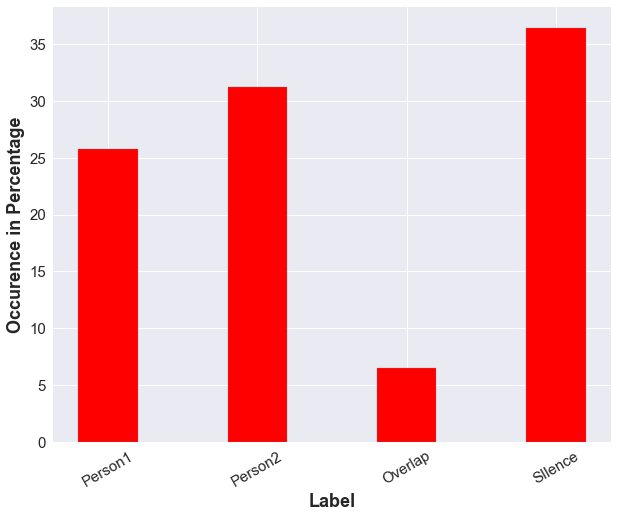

In [10]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.style.use('seaborn')
# set width of bar
barWidth = 0.4
fig = plt.subplots(figsize =(10, 8))
 
# set height of bar
TurnCh_To_Speak = [(person1/tot)*100,(person2/tot)*100,(overl/tot)*100,(silence/tot)*100]
# Set position of bar on X axis
br1 = np.arange(4)+0.4
# Make the plot
plt.bar(br1, TurnCh_To_Speak, color ='r', width = barWidth,
        edgecolor ='grey', label ='Label')

 
# Adding Xticks
plt.xlabel('Label', fontweight ='bold', fontsize = 18)
plt.ylabel('Occurence in Percentage', fontweight ='bold', fontsize = 18)
plt.xticks([r + barWidth for r in range(len(TurnCh_To_Speak))],
        ['Person1','Person2','Overlap','SIlence'],fontsize = 15,rotation=30)
plt.yticks(fontsize = 15) 
plt.savefig('perchnonva.png',dpi=100)

plt.show()
